## Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from fbprophet import Prophet
# from fbprophet.diagnostics import cross_validation
# from fbprophet.diagnostics import performance_metrics
# from fbprophet.plot import plot_cross_validation_metric

## Read Data

In [2]:
filename = "../data/data.csv"

In [3]:
df = pd.read_csv(filename)

In [4]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

In [5]:
df.head()

,datetime,consumption,temp
0,"12/19/2018, 3:00:02 PM",249,69
1,"12/19/2018, 4:00:03 PM",294,69
2,"12/19/2018, 6:00:02 PM",287,69
3,"12/19/2018, 7:00:02 PM",285,69
4,"12/19/2018, 8:00:02 PM",228,69


### Convert index to datetime

In [6]:
df = pd.read_csv(filename,index_col = 'datetime',parse_dates=['datetime'])
df.head(5)

,consumption,temp
datetime,,
2018-12-19 15:00:02,249,69
2018-12-19 16:00:03,294,69
2018-12-19 18:00:02,287,69
2018-12-19 19:00:02,285,69
2018-12-19 20:00:02,228,69


### Verify that no value is null

In [7]:
df.isna().sum()

consumption    0
temp           0
dtype: int64

In [8]:
df['consumption'] = df['consumption'] + 1

In [9]:
min(df.consumption)

1

# Energy Consumption vs Datetime Graph

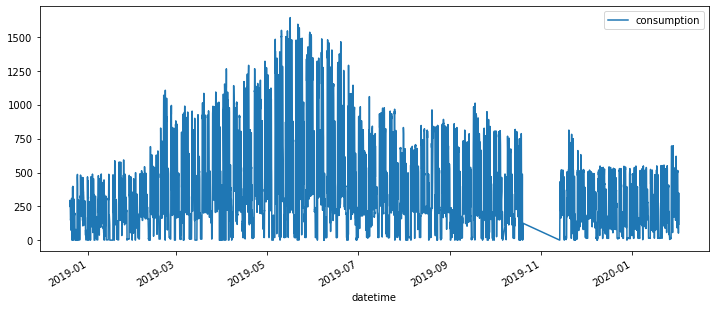

In [10]:
df.plot(y=['consumption'],figsize=(12,5),legend=True)
plt.show()

# Temperature vs Datetime Graph

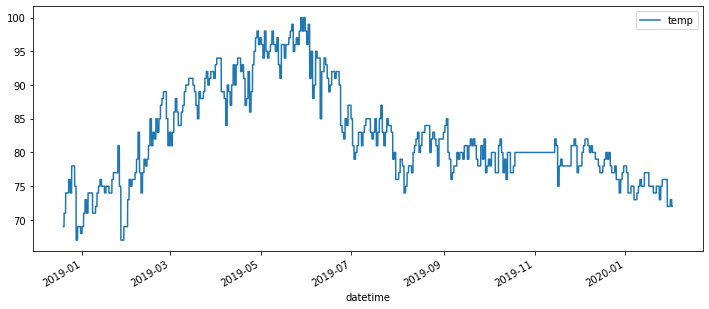

In [11]:
df.plot(y=['temp'],figsize=(12,5),legend=True)
plt.show()

## Maximum Energy Consumption Values

In [12]:
df.nlargest(10,'consumption')

,consumption,temp
datetime,,
2019-05-16 12:00:02,1643,96
2019-05-16 11:00:01,1620,96
2019-05-21 15:00:02,1594,98
2019-05-21 16:00:02,1583,98
2019-05-22 14:00:02,1568,99
2019-05-22 15:00:02,1568,99
2019-05-22 12:00:01,1554,99
2019-05-22 13:00:02,1551,99
2019-05-10 15:00:02,1549,96


# Maximum Temperature Values

In [13]:
df.nlargest(10,'temp')

,consumption,temp
datetime,,
2019-05-27 22:00:02,490,100
2019-05-27 23:00:02,484,100
2019-05-28 00:00:02,470,100
2019-05-28 01:00:02,464,100
2019-05-28 02:00:01,422,100
2019-05-28 03:00:02,389,100
2019-05-28 04:00:02,369,100
2019-05-28 05:00:02,304,100
2019-05-28 06:00:02,246,100


In [14]:
df = df.reset_index()

In [15]:
df.count()

datetime       9041
consumption    9041
temp           9041
dtype: int64

## Changing dataframe format specific to Prophet Model

In [16]:
df = df.rename(columns={'datetime':'ds','consumption':'y'})

In [17]:
df.count()

ds      9041
y       9041
temp    9041
dtype: int64

In [18]:
df.nlargest(10,'y')

,ds,y,temp
3502,2019-05-16 12:00:02,1643,96
3501,2019-05-16 11:00:01,1620,96
3625,2019-05-21 15:00:02,1594,98
3626,2019-05-21 16:00:02,1583,98
3648,2019-05-22 14:00:02,1568,99
3649,2019-05-22 15:00:02,1568,99
3646,2019-05-22 12:00:01,1554,99
3647,2019-05-22 13:00:02,1551,99
3361,2019-05-10 15:00:02,1549,96
3650,2019-05-22 16:00:01,1548,99


In [19]:
df.y = np.log(df.y)

## Model Fitting

In [20]:
model = Prophet()
model.add_country_holidays(country_name='IN')
model.add_regressor('temp')

In [21]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



# List of Holidays 

In [22]:
model.train_holiday_names

0                        Republic Day
1                    Independence Day
2                      Gandhi Jayanti
3                              Diwali
4                                Holi
5                       Day of Ashura
6                              Mawlid
7                         Eid al-Fitr
8              Feast of the Sacrifice
9                      New Year's Day
10                        Palm Sunday
11                    Maundy Thursday
12                        Good Friday
13                      Easter Sunday
14                 Feast of Pentecost
15    Fest of St. Theresa of Calcutta
16        Feast of the Blessed Virgin
17                     All Saints Day
18                      All Souls Day
19                      Christmas Day
20                         Boxing Day
21               Feast of Holy Family
dtype: object

## Predictions

In [23]:
# future = model.make_future_dataframe(periods=365)

In [24]:
prediction=model.predict(df)

In [25]:
org_prediction = prediction.copy()

In [26]:
# prediction[prediction.columns[1:]] = np.exp(prediction[prediction.columns[1:]])

In [27]:
prediction.nlargest(10,'yhat')

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,temp,temp_lower,temp_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3788,2019-05-28 10:00:02,5.640953,5.821711,9.007143,5.640953,5.640953,0.0,0.0,0.0,0.0,...,0.257261,0.257261,0.257261,0.837413,0.837413,0.837413,0.0,0.0,0.0,7.404698
3789,2019-05-28 11:00:01,5.640934,5.783476,9.061444,5.640934,5.640934,0.0,0.0,0.0,0.0,...,0.257261,0.257261,0.257261,0.808317,0.808317,0.808317,0.0,0.0,0.0,7.403266
3620,2019-05-21 10:00:02,5.619663,5.798280,8.973499,5.619663,5.619663,0.0,0.0,0.0,0.0,...,0.227763,0.227763,0.227763,0.837413,0.837413,0.837413,0.0,0.0,0.0,7.353910
3621,2019-05-21 11:00:02,5.619819,5.746114,8.907484,5.619819,5.619819,0.0,0.0,0.0,0.0,...,0.227763,0.227763,0.227763,0.808309,0.808309,0.808309,0.0,0.0,0.0,7.352629
3956,2019-06-04 10:00:02,5.637732,5.653913,8.975234,5.637732,5.637732,0.0,0.0,0.0,0.0,...,0.183516,0.183516,0.183516,0.837413,0.837413,0.837413,0.0,0.0,0.0,7.327733
3957,2019-06-04 11:00:03,5.637713,5.669892,8.903129,5.637713,5.637713,0.0,0.0,0.0,0.0,...,0.183516,0.183516,0.183516,0.808300,0.808300,0.808300,0.0,0.0,0.0,7.326250
4005,2019-06-06 11:00:02,5.636792,5.797803,8.898082,5.636792,5.636792,0.0,0.0,0.0,0.0,...,0.109772,0.109772,0.109772,0.590742,0.590742,0.590742,0.0,0.0,0.0,7.280229
4122,2019-06-11 10:00:02,5.627510,5.712345,8.806041,5.627510,5.627510,0.0,0.0,0.0,0.0,...,0.139270,0.139270,0.139270,0.837413,0.837413,0.837413,0.0,0.0,0.0,7.273264
3790,2019-05-28 12:00:02,5.640914,5.644687,8.773043,5.640914,5.640914,0.0,0.0,0.0,0.0,...,0.257261,0.257261,0.257261,0.775640,0.775640,0.775640,0.0,0.0,0.0,7.273086
4123,2019-06-11 11:00:02,5.627395,5.632948,8.826051,5.627395,5.627395,0.0,0.0,0.0,0.0,...,0.139270,0.139270,0.139270,0.808309,0.808309,0.808309,0.0,0.0,0.0,7.271712


### Let's check for effect of Gandhi Jayanti on consumption value

In [28]:
prediction.nlargest(10,'Gandhi Jayanti')[['ds','Gandhi Jayanti']]

,ds,Gandhi Jayanti
6752,2019-10-02 00:00:01,0.026672
6753,2019-10-02 01:00:02,0.026672
6754,2019-10-02 02:00:01,0.026672
6755,2019-10-02 03:00:02,0.026672
6756,2019-10-02 04:00:02,0.026672
6757,2019-10-02 05:00:02,0.026672
6758,2019-10-02 06:00:02,0.026672
6759,2019-10-02 07:00:02,0.026672
6760,2019-10-02 08:00:01,0.026672
6761,2019-10-02 09:00:02,0.026672


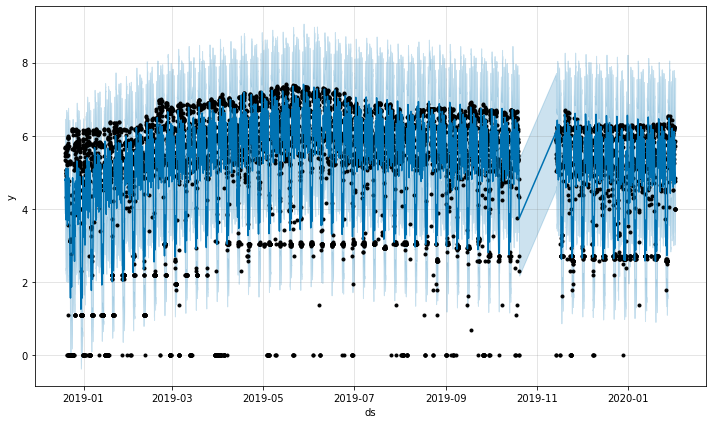

In [29]:
fig = model.plot(prediction)

## Monthly, Daywise and Timewise distribution

In [30]:
# prediction[prediction.columns[1:]] = np.exp(prediction[prediction.columns[1:]])

The values in the graph basically represents the effect of values corresponding to x-axis on result predicted on y-axis

/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



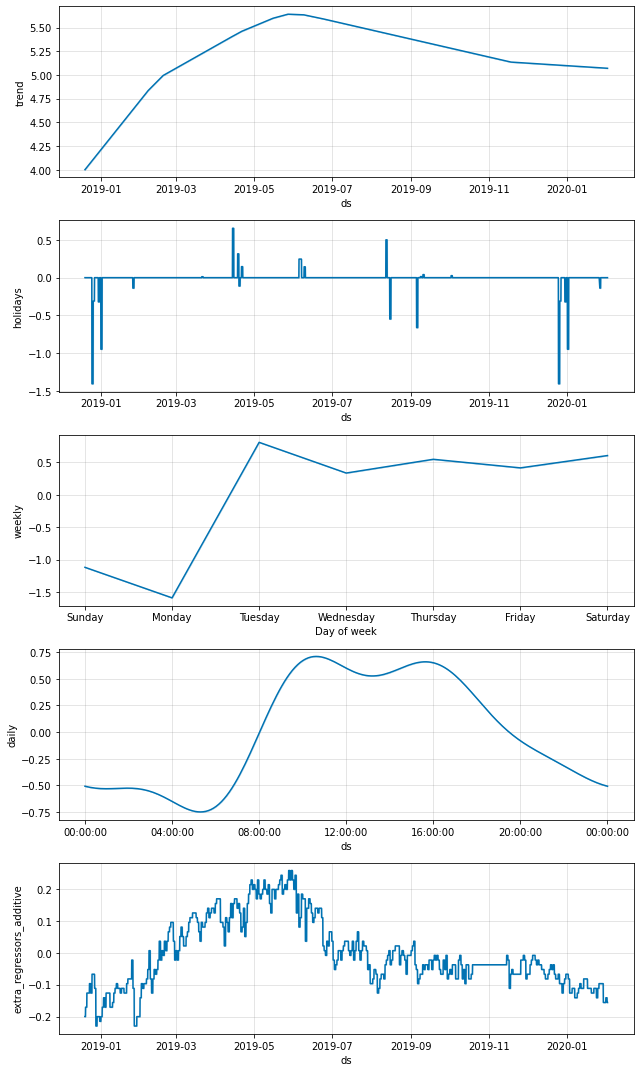

In [31]:
fig = model.plot_components(prediction)

In [32]:
df.head()

,ds,y,temp
0,2018-12-19 15:00:02,5.521461,69
1,2018-12-19 16:00:03,5.686975,69
2,2018-12-19 18:00:02,5.662960,69
3,2018-12-19 19:00:02,5.655992,69
4,2018-12-19 20:00:02,5.433722,69


In [33]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,temp,temp_lower,temp_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-12-19 15:00:02,4.000812,3.157186,6.456423,4.000812,4.000812,0.0,0.0,0.0,0.0,...,-0.199954,-0.199954,-0.199954,0.348177,0.348177,0.348177,0.0,0.0,0.0,4.785256
1,2018-12-19 16:00:03,4.001517,3.180573,6.462475,4.001517,4.001517,0.0,0.0,0.0,0.0,...,-0.199954,-0.199954,-0.199954,0.370681,0.370681,0.370681,0.0,0.0,0.0,4.821819
2,2018-12-19 18:00:02,4.002926,3.029318,6.054225,4.002926,4.002926,0.0,0.0,0.0,0.0,...,-0.199954,-0.199954,-0.199954,0.417761,0.417761,0.417761,0.0,0.0,0.0,4.535848
3,2018-12-19 19:00:02,4.003631,2.720775,5.848670,4.003631,4.003631,0.0,0.0,0.0,0.0,...,-0.199954,-0.199954,-0.199954,0.441530,0.441530,0.441530,0.0,0.0,0.0,4.335331
4,2018-12-19 20:00:02,4.004336,2.561439,5.796468,4.004336,4.004336,0.0,0.0,0.0,0.0,...,-0.199954,-0.199954,-0.199954,0.464917,0.464917,0.464917,0.0,0.0,0.0,4.187794


## Errors

In [34]:
true_val = df.y

In [35]:
pred_val = org_prediction['yhat']

In [36]:
mean_squared_error(y_true=true_val,y_pred=pred_val)

1.537449985497118

In [37]:
mean_absolute_error(y_true=true_val,y_pred=pred_val)

0.7311970577827229

In [38]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [39]:
mean_absolute_percentage_error(y_true=true_val,y_pred=pred_val)

/home/kanish/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in true_divide



inf

In [40]:
# df_cv = cross_validation(model, initial='300 days', period='35 days', horizon='70 days')
# df_cv.head()

In [41]:
# performance_metrics_results = performance_metrics(df_cv)
# print(performance_metrics_results)

In [42]:
# plot_cross_validation_metric(df_cv, metric='mape')

## Prediction

In [43]:
data = ['2019-10-27 12:00:00']
test = pd.DataFrame(data, columns = ['ds']) 

In [44]:
test['temp'] = 40

In [45]:
test

,ds,temp
0,2019-10-27 12:00:00,40


In [46]:
val = model.predict(test)

/home/kanish/.local/lib/python3.6/site-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



In [47]:
# val[val.columns[1:]] = np.exp(val[val.columns[1:]])

In [48]:
val

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,...,temp,temp_lower,temp_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-10-27 12:00:00,5.201526,1.596697,4.833762,5.201526,5.201526,0.0,0.0,0.0,0.0,...,-0.62767,-0.62767,-0.62767,-2.024331,-2.024331,-2.024331,0.0,0.0,0.0,3.148856


In [49]:
np.exp(val['yhat'])

0    23.30939
Name: yhat, dtype: float64

## Saving Model

In [50]:
type(model)

fbprophet.forecaster.Prophet

In [51]:
pkl_path = "model.pkl"

In [52]:
model.stan_backend.logger = None

In [53]:
with open(pkl_path, 'wb') as fout:
    pickle.dump(model, fout)

In [54]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)